<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
#######################################################################################
#######################################################################################

In [7]:
############################################################
# A boxplot for the "Median value of owner-occupied homes" #
############################################################

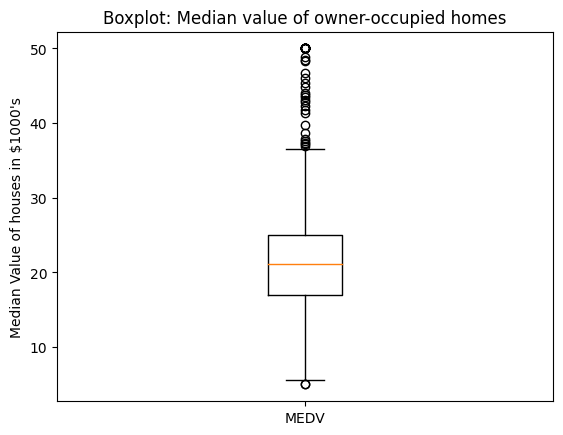

In [8]:
pyplot.boxplot(boston_df['MEDV'], labels=["MEDV"])
pyplot.title("Boxplot: Median value of owner-occupied homes")
pyplot.ylabel("Median Value of houses in $1000's")
pyplot.show()

In [9]:
# CONCLUSION:
# The boxplot shows the median value of houses around 21

In [10]:
#######################################################################################
#######################################################################################

In [11]:
#############################################
# A bar plot for the Charles river variable #
#############################################

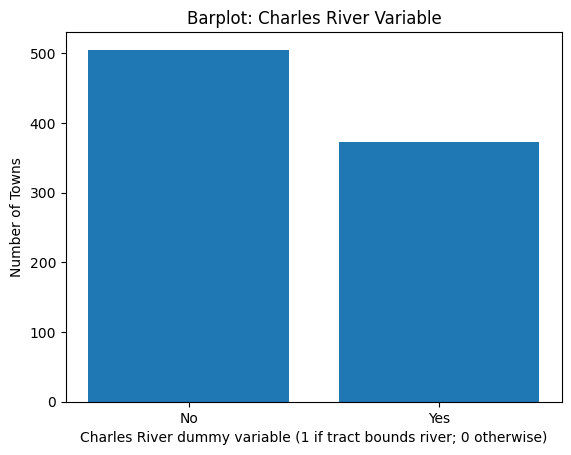

In [12]:
pyplot.bar(boston_df['CHAS'].astype(str), boston_df['Unnamed: 0'])
pyplot.title('Barplot: Charles River Variable')
pyplot.xlabel('Charles River dummy variable (1 if tract bounds river; 0 otherwise)')
pyplot.ylabel('Number of Towns')
pyplot.xticks(ticks=[0, 1], labels=['No', 'Yes'])
pyplot.show()

In [13]:
# CONCLUSION:
# The barplot shows shows that around 500 tracts border the river and 375 do not

In [14]:
#######################################################################################
#######################################################################################

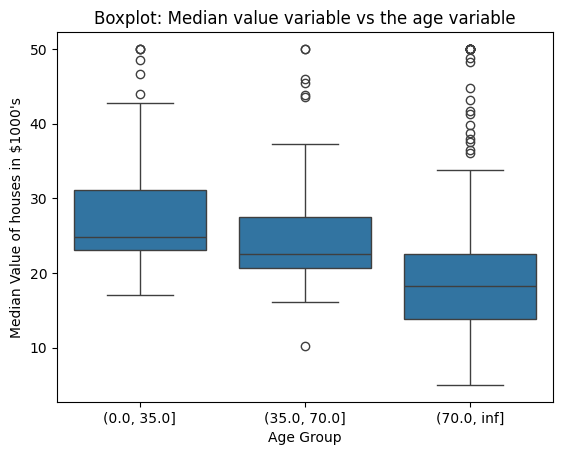

In [15]:
# A boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['bin'] = pd.cut(boston_df['AGE'],  [0, 35, 70, float("inf")])
sns.boxplot(boston_df, x='bin', y='MEDV')
pyplot.title('Boxplot: Median value variable vs the age variable')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of houses in $1000\'s')
pyplot.show()

In [16]:
# CONCLUSION:
# The median values shows the older the person the lower the median value

In [17]:
#######################################################################################
#######################################################################################

In [18]:
# Scatter plot to show the relationship between Nitric oxide concentrations and the 
# proportion of non-retail business acres per town.

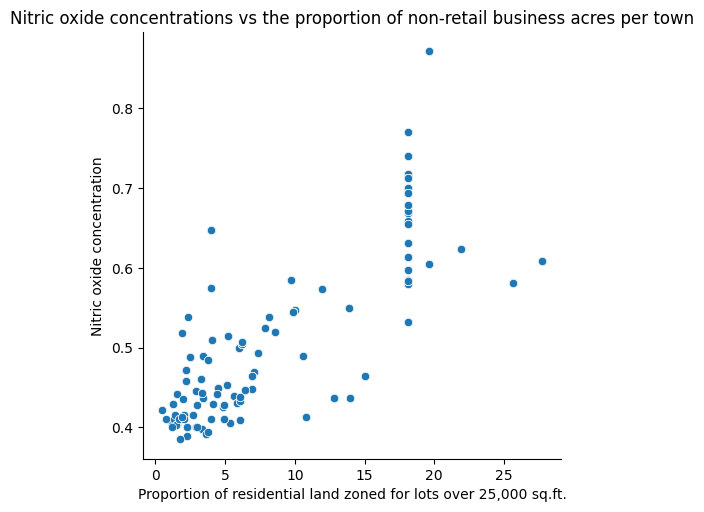

In [19]:
sns.relplot(boston_df, x="INDUS", y="NOX")
pyplot.title('Nitric oxide concentrations vs the proportion of non-retail business acres per town')
pyplot.xlabel('Proportion of residential land zoned for lots over 25,000 sq.ft.')
pyplot.ylabel('Nitric oxide concentration')
pyplot.show()

In [20]:
# CONCLUSION:
# The scatter plot shows that as the concentration of Nitric oxide goes up, 
# the proportion of non-retail business acres goes down

In [21]:
#######################################################################################
#######################################################################################

In [22]:
# Histogram for the pupil to teacher ratio variable

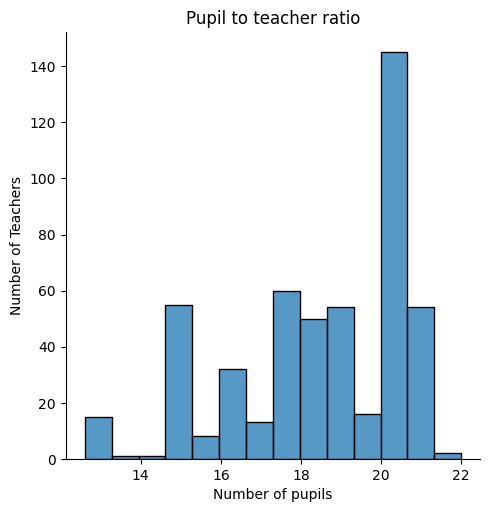

In [23]:
ax = sns.displot(boston_df, x="PTRATIO")
ax.set(title='Histogram: Pupil to teacher ratio')
ax.set_axis_labels('Number of pupils', 'Number of Teachers')

In [24]:
# CONCLUSION:
# The Histogram shows that most teacher have about 20 pupils

In [25]:
#######################################################################################
#######################################################################################

In [26]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? 
#(T-test for independent samples)

In [27]:
# HYPTHOSIS
# HO there is no difference in median value for housed bounded by the river
# H1 there is a difference in median value for housed bounded by the river

In [29]:
# t-Test
group_bounded = boston_df[boston_df['CHAS']==1]['MEDV']
group_not_bounded = boston_df[boston_df['CHAS']==0]['MEDV']

statistic, pvalue = scipy.stats.ttest_ind(group_bounded, group_not_bounded)

print(f"T-statistic: {statistic}")
print(f"P-value: {pvalue}")

if pvalue < 0.05:
    print("There is a significant difference")
else:
    print("There is no significant difference")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
There is a significant difference


In [30]:
# CONCLUSION
# The p-value is 7.390e-05. Therefore the p-value is less and 0.05 and we can reject the null hypothesis
# There is a significant difference in median value of houses bounded by the Charles river.

In [31]:
#######################################################################################
#######################################################################################

In [32]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied 
# units built prior to 1940 (AGE)? (ANOVA)

In [33]:
# HYPTHOSIS
# HO There is no difference in the Median values for owner occupied units build prior to 1940
# H1 There is a difference in the Median values for owner occupied units build prior to 1940

In [35]:
prices_before = boston_df[boston_df['AGE']>84]
prices_after = boston_df[boston_df['AGE']<85]

#Anova test
statistic, pvalue = scipy.stats.f_oneway(prices_before['MEDV'], prices_after['MEDV'])

print(f"F-statistic: {statistic}")
print(f"P-value: {pvalue}")

if pvalue < 0.05:
    print("There is a significant difference")
else:
    print("There is no significant difference")

F-statistic: 70.18773129216741
P-value: 5.239324134313732e-16
There is a significant difference


In [36]:
# CONCLUSION
# The p-value is 5.239e-16. Therefore the p-value is less and 0.05 and we can reject the null hypothesis
# There is a significant difference in median value of houses built before 1940

In [37]:
#######################################################################################
#######################################################################################

In [38]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion 
# of non-retail business acres per town? (Pearson Correlation)

In [39]:
# HYPTHOSIS
# HO There is no relationship between Nitric oxide concentrations and proportion 
# H1 There is a relationship between Nitric oxide concentrations and proportion

In [41]:
# Pearson Correlation Test
statistic, pvalue = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

print(f"F-statistic: {statistic}")
print(f"P-value: {pvalue}")

if pvalue < 0.05:
    print("There is a significant difference")
else:
    print("There is no significant difference")

F-statistic: 0.7636514469209192
P-value: 7.913361061210442e-98
There is a significant difference


In [42]:
# CONCLUSION
# The p-value is 7.2315e-36. Therefore the p-value is less and 0.05 and we can reject the null hypothesis
# There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [43]:
#######################################################################################
#######################################################################################

In [44]:
# What is the impact of an additional weighted distance to the five Boston employment 
# centres on the median value of owner occupied homes? (Regression analysis)

In [45]:
# HYPTHOSIS
# HO There is no an impact of an additional weighted distance to the five Boston employment 
# centres on the median value of owner occupied homes
# H1 There is an impact of an additional weighted distance to the five Boston employment 
# centres on the median value of owner occupied homes

In [46]:
model = sm.OLS(boston_df['MEDV'], boston_df['DIS']).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Wed, 31 Jul 2024   Prob (F-statistic):                   1.52e-146
Time:                        13:16:20   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# CONCLUSION
# The coefficient is 4.7985. The Null hypothesis can be rejected. The impact of adding an additional weight is significant.